In [1]:
# Cellule 1
import yfinance as yf
import pandas as pd


tesla = yf.Ticker("TSLA")
tesla_history = tesla.history(period="max")  
print("Aperçu des données Tesla :")
print(tesla_history.head())


Aperçu des données Tesla :
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [4]:
import requests
import pandas as pd

tesla_revenue_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"
}

response = requests.get(tesla_revenue_url, headers=headers)
if response.status_code == 200:
    tesla_revenue_tables = pd.read_html(response.text)
    tesla_revenue = tesla_revenue_tables[0]
    tesla_revenue.columns = ['Date', 'Revenue']
    print("Revenus de Tesla :")
    print(tesla_revenue.head())
else:
    print("Erreur lors de la récupération de la page :", response.status_code)


Revenus de Tesla :
   Date  Revenue
0  2024  $97,690
1  2023  $96,773
2  2022  $81,462
3  2021  $53,823
4  2020  $31,536


C:\Users\yoyof\AppData\Local\Temp\ipykernel_23444\4255245633.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue_tables = pd.read_html(response.text)


In [5]:
# Cellule 3
gme = yf.Ticker("GME")
gme_history = gme.history(period="max")
print("Aperçu des données GameStop :")
print(gme_history.head())


Aperçu des données GameStop :
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [7]:
import requests
import pandas as pd

gme_revenue_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"
}

response = requests.get(gme_revenue_url, headers=headers)
if response.status_code == 200:
    gme_revenue_tables = pd.read_html(response.text)
    gme_revenue = gme_revenue_tables[0]
    gme_revenue.columns = ['Date', 'Revenue']
    print("Revenus de GameStop :")
    print(gme_revenue.head())
else:
    print("Erreur lors de la récupération de la page :", response.status_code)



Revenus de GameStop :
   Date Revenue
0  2024  $5,273
1  2023  $5,927
2  2022  $6,011
3  2021  $5,090
4  2020  $6,466


C:\Users\yoyof\AppData\Local\Temp\ipykernel_23444\2471166839.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue_tables = pd.read_html(response.text)


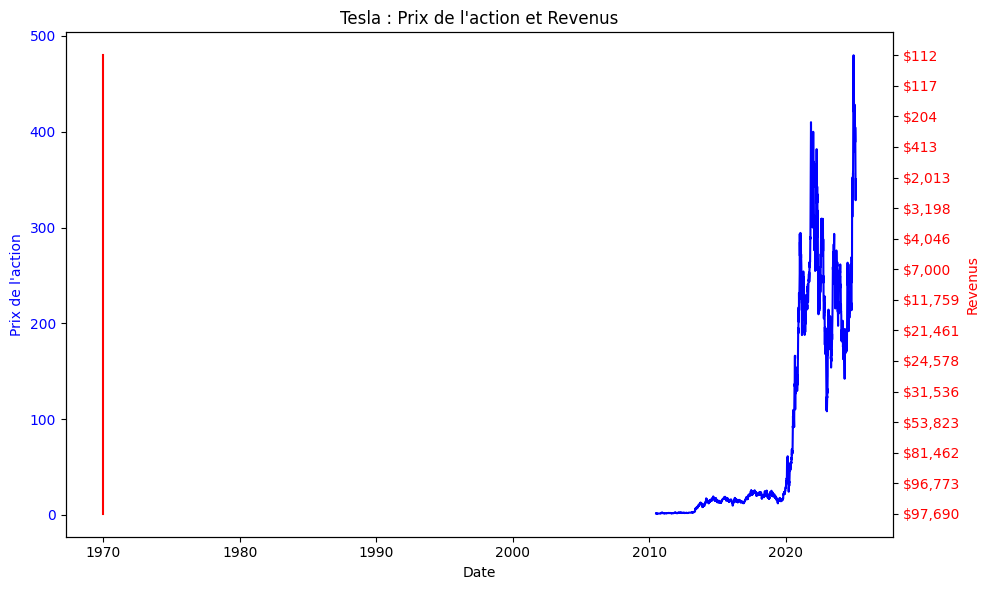

In [8]:
# Cellule 5
import matplotlib.pyplot as plt

# Préparation des données pour le graphique
# Pour Tesla, la date dans les données boursières est l'index ; on la réinitialise en colonne.
tesla_history = tesla_history.reset_index()
# Conversion de la colonne Date au format datetime
tesla_history['Date'] = pd.to_datetime(tesla_history['Date'])
# Assurez-vous que la colonne 'Date' de tesla_revenue est bien en datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')

# Création du graphique avec deux axes (prix de l'action et revenus)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer le cours de l'action Tesla
ax1.plot(tesla_history['Date'], tesla_history['Close'], color='blue', label='Prix Action Tesla')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prix de l\'action', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Axe secondaire pour les revenus
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='red', label='Revenus Tesla')
ax2.set_ylabel('Revenus', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tesla : Prix de l\'action et Revenus')
fig.tight_layout()
plt.show()


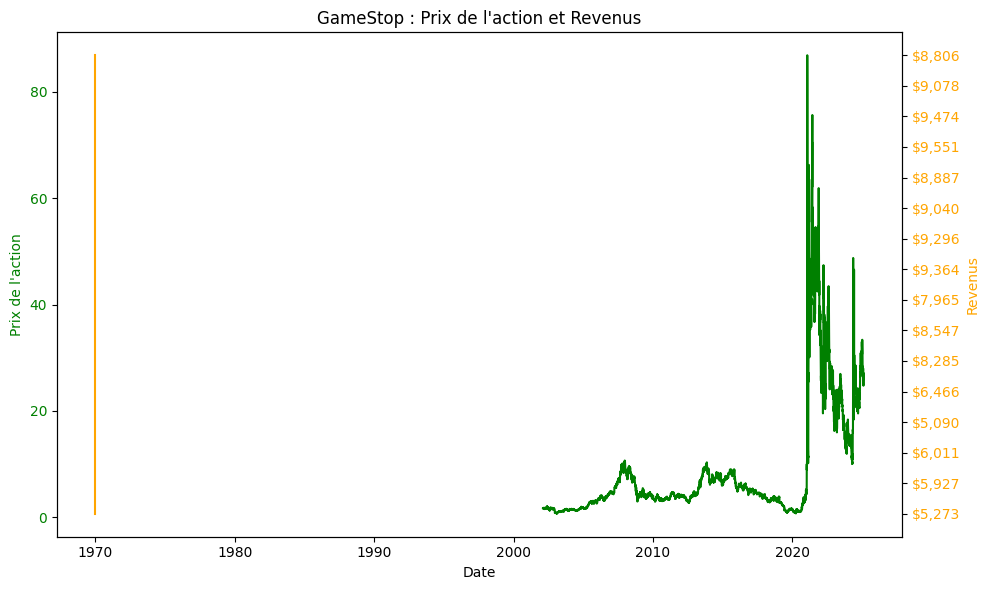

In [9]:
# Cellule 6
# Préparation des données pour GameStop
gme_history = gme_history.reset_index()
gme_history['Date'] = pd.to_datetime(gme_history['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')

# Création du graphique pour GameStop
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer le cours de l'action GameStop
ax1.plot(gme_history['Date'], gme_history['Close'], color='green', label='Prix Action GameStop')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prix de l\'action', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Axe secondaire pour les revenus
ax2 = ax1.twinx()
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='orange', label='Revenus GameStop')
ax2.set_ylabel('Revenus', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('GameStop : Prix de l\'action et Revenus')
fig.tight_layout()
plt.show()
